# Deep Learning: Coursework 1

**Student Name:**  Oliver Wesely (Student Number: 18057603 )

**Start date:** *15th January 2019*

**Due date:** *05th February 2019, 09:00 am*

## How to Submit

When you have completed the exercises and everything has finished running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_cw1.ipynb** before the deadline above.

Please produce a **pdf** with all the **results** (tables and plots) as well as the **answers** to the questions below. For this assignment, you don't need to include any of the code in the pdf, but answers to the questions should be self-contained and should not rely on a code reference.  Page limit: 15 pg. 


### IMPORTANT
Please make sure you submission includes **all results/plots/tables** required for grading. We should not have to re-run your code.



# Assignment Description

## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below).



## The Assignment

### Objectives

Familiarise yourselves with Tensorflow and basic concepts we have covered in the course: like simple neural network models (fully connected models, convolutional networks) and backpropagation.

You will then train these models to classify hand written digits from the Mnist dataset.

### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

    initializer = tf.contrib.layers.xavier_initializer()
    my_variable = tf.Variable(initializer(shape))

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.

*Note*: Sum the loss across the elements of the batch with tf.reduce_sum().

*Hint*: read about TensorFlow's [tf.nn.softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits) function.

### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function.

*Hint*: read about TensorFlow's [tf.train.GradientDescentOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer).


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 
each time evaluate the accuracy of the model both on **20% of the train set** and on **the entire test set**.

### Reporting

For each model `i`, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       ((num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       ((num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       ((num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]

### Hint 

If you need some extra help, familiarizing yourselves with the dataset and the task of building models in TensorFlow, you can check the [TF tutorial for MNIST](https://www.tensorflow.org/tutorials/mnist/beginners/). 

The tutorial will walk you through the MNIST classification task step-by-step, building and optimizing a model in TensorFlow. 

(Please do not copy the provided code, though. Walk through the tutorial, but write your own implementation).

# Imports and utility functions (do not modify!)

In [0]:
# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

# Global variables.
log_period_samples = 20000
batch_size = 100

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10])
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 3, figsize=(16,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      # Plot.
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Task {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      if test_accuracy != []:
        cell_text[i].append(test_accuracy[-1])
      else:
        print('Warning: Something went wrong! Missing testing/training data')
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

# PART 1: TensorFlow + Simple NN models  (30 pts) 

## Model 1 (5 pts)

### Network

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1

In [9]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = []
settings = [(5, 0.0001), (5, 0.001), (15, 0.1)]

print('Training Model 1')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:

  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()
  x, y_ = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()
  
  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  W=tf.get_variable("W",shape=[784,10],initializer=tf.contrib.layers.xavier_initializer())
  b=tf.get_variable("b",shape=10,initializer=tf.contrib.layers.xavier_initializer())
  
  y=tf.add(tf.matmul(x,W),b)
  y_preds=tf.nn.softmax(y)
  ce=tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))
  opt=tf.train.GradientDescentOptimizer(learning_rate).minimize(ce)  
  
  
  correct_labels=tf.equal(tf.argmax(y_preds,1),tf.argmax(y_,1))
  get_accuracy=tf.reduce_mean(tf.cast(correct_labels,tf.float32))
    
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      
      #################
      # Training step #
      #################
      _,c=sess.run([opt,ce],feed_dict={x:batch_xs,y_:batch_ys})
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        n_train=mnist.train.images.shape[0]
        n_20_percent=int(n_train*0.2)
        ind_rand=np.random.choice(n_train,n_20_percent,replace=False)
        
        train_im_20_p=np.take(mnist.train.images,ind_rand,axis=0)
        train_lb_20_p=np.take(mnist.train.labels,ind_rand,axis=0)
        
        tr_accuracy=sess.run([get_accuracy],feed_dict={x:train_im_20_p,y_:train_lb_20_p})
        train_accuracy.append(tr_accuracy)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_im=mnist.test.images
        test_lb=mnist.test.labels
        te_accuracy=sess.run([get_accuracy],feed_dict={x:test_im,y_:test_lb})
        test_accuracy.append(te_accuracy)
        
    experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

## Model 2 (5 pts)

### Network
1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [11]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

print('Training Model 2')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  W1=tf.get_variable("W1",shape=[784,32],initializer=tf.contrib.layers.xavier_initializer())
  b1=tf.get_variable("b1",shape=32,initializer=tf.contrib.layers.xavier_initializer())
  W2=tf.get_variable("W2",shape=[32,10],initializer=tf.contrib.layers.xavier_initializer())
  b2=tf.get_variable("b2",shape=10,initializer=tf.contrib.layers.xavier_initializer())
  
  y1=tf.add(tf.matmul(x,W1),b1)
  y1_preds=tf.nn.relu(y1)
  y2=tf.add(tf.matmul(y1_preds,W2),b2)
  y2_preds=tf.nn.softmax(y2)
  ce=tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=y2,labels=y_))
  opt=tf.train.GradientDescentOptimizer(learning_rate).minimize(ce)  
  
  correct_labels=tf.equal(tf.argmax(y2_preds,1),tf.argmax(y_,1))
  get_accuracy=tf.reduce_mean(tf.cast(correct_labels,tf.float32))
    
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      _,c=sess.run([opt,ce],feed_dict={x:batch_xs,y_:batch_ys})
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        n_train=mnist.train.images.shape[0]
        n_20_percent=int(n_train*0.2)
        ind_rand=np.random.choice(n_train,n_20_percent,replace=False)
        
        train_im_20_p=np.take(mnist.train.images[:,:],ind_rand,axis=0)
        train_lb_20_p=np.take(mnist.train.labels[:,:],ind_rand,axis=0)
        
        tr_accuracy=sess.run([get_accuracy],feed_dict={x:train_im_20_p,y_:train_lb_20_p})
        train_accuracy.append(tr_accuracy)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_im=mnist.test.images
        test_lb=mnist.test.labels
        te_accuracy=sess.run([get_accuracy],feed_dict={x:test_im,y_:test_lb})
        test_accuracy.append(te_accuracy)

    experiments_task2.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

## Model 3 (5 pts)

### Network
2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.05

In [23]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3 = []
settings = [(5, 0.001), (40, 0.001), (40, 0.05)]

print('Training Model 3')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  W1=tf.get_variable("W1",shape=[784,32],initializer=tf.contrib.layers.xavier_initializer())
  b1=tf.get_variable("b1",shape=32,initializer=tf.contrib.layers.xavier_initializer())
  W2=tf.get_variable("W2",shape=[32,32],initializer=tf.contrib.layers.xavier_initializer())
  b2=tf.get_variable("b2",shape=32,initializer=tf.contrib.layers.xavier_initializer())
  W3=tf.get_variable("W3",shape=[32,10],initializer=tf.contrib.layers.xavier_initializer())
  b3=tf.get_variable("b3",shape=10,initializer=tf.contrib.layers.xavier_initializer())
  
  y1=tf.add(tf.matmul(x,W1),b1)
  y1_preds=tf.nn.relu(y1)
  y2=tf.add(tf.matmul(y1_preds,W2),b2)
  y2_preds=tf.nn.relu(y2)
  y3=tf.add(tf.matmul(y2_preds,W3),b3)
  y3_preds=tf.nn.softmax(y3)
  ce=tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=y3,labels=y_))
  opt=tf.train.GradientDescentOptimizer(learning_rate).minimize(ce)  
  
  correct_labels=tf.equal(tf.argmax(y3_preds,1),tf.argmax(y_,1))
  get_accuracy=tf.reduce_mean(tf.cast(correct_labels,tf.float32))
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      _,c=sess.run([opt,ce],feed_dict={x:batch_xs,y_:batch_ys})
      

      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        n_train=mnist.train.images.shape[0]
        n_20_percent=int(n_train*0.2)
        ind_rand=np.random.choice(n_train,n_20_percent,replace=False)
        
        train_im_20_p=np.take(mnist.train.images[:,:],ind_rand,axis=0)
        train_lb_20_p=np.take(mnist.train.labels[:,:],ind_rand,axis=0)
        
        tr_accuracy=sess.run([get_accuracy],feed_dict={x:train_im_20_p,y_:train_lb_20_p})
        train_accuracy.append(tr_accuracy)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_im=mnist.test.images
        test_lb=mnist.test.labels
        te_accuracy=sess.run([get_accuracy],feed_dict={x:test_im,y_:test_lb})
        test_accuracy.append(te_accuracy)

    experiments_task3.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

# Results

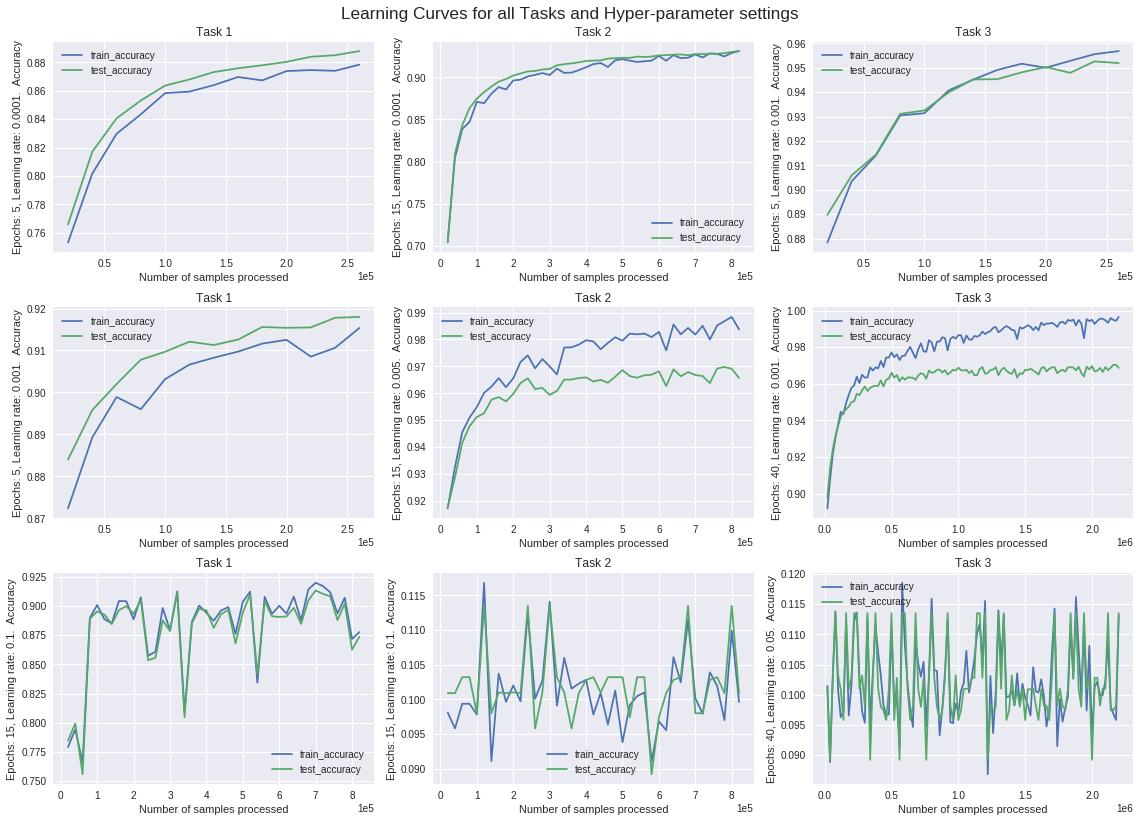

In [13]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3])

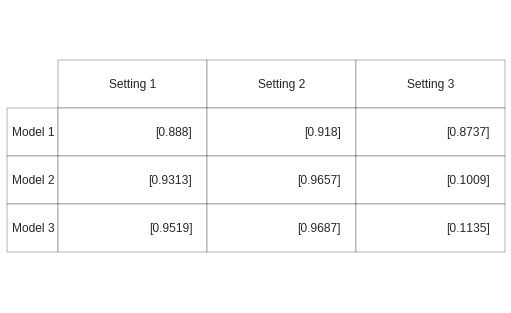

In [14]:
plot_summary_table([experiments_task1, experiments_task2, experiments_task3]) 

# Questions

### Q1.1 (3 pts): Indicate which of the previous experiments constitute an example of over-fitting. Why is this happening?

Models 2 and 3 with parameter setting 2 are overfitting the training data,  as with an increasing number of processed samples the accuracy of the training data increases to nearly 1 but the accuracy of the test data stays between 0.96 and 0.97. The reason for overfitting in these two models and settings is that Models 2 and 3 are more complex compared to Model 1, as they use one and two hidden layers. Therefor they can predict the overall model better and have the highest accuracy on the training data and testing data but converge to different values. Regarding parameter settings an increasing number of epochs in combination with a normal learning rate tends to outperform within the training set compared to the testing set. 

### Q1.2 (2 pts): Indicate which of the previous experiments constitute an example of under-fitting. Why is this happening?

Models 2 and 3 with parameter setting 3 are underfitting the data, the model neither fits the training nor the testing data at all. With an accuracy of about 0.1 we would get about the same accuracy if we would classify uniformly at random. The reason for this underfitting is the combination of complex models and a high learning rate. Comparing it with parameter setting 3 of Model 1 we can see that if the model is not so complex it can still reach a good fitting unless the jumps within this fitting are really high and preferably not to rely on neither.

### Q1.3 (2 pts): How would you prevent over-/under-fitting from happening?

 To prevent overfitting you can use
Drop Out, Batch normalisation, use fewer features, increase regularisation. 

To prevent underfitting you can use a more complex model, get more training data, use different initialisation using grid search for example

### Q1.4 (8 pts): Pick one model that is over-fitting and implement your proposed fix. Train your model and report your new training/testing curves below. 

In [73]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task4 = []
settings = [(5, 0.001), (40, 0.001), (40, 0.05)]

print('Training Model 4')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  W1=tf.get_variable("W1",shape=[784,512],initializer=tf.contrib.layers.xavier_initializer())
  b1=tf.get_variable("b1",shape=512,initializer=tf.contrib.layers.xavier_initializer())
  W2=tf.get_variable("W2",shape=[512,64],initializer=tf.contrib.layers.xavier_initializer())
  b2=tf.get_variable("b2",shape=64,initializer=tf.contrib.layers.xavier_initializer())
  W3=tf.get_variable("W3",shape=[64,10],initializer=tf.contrib.layers.xavier_initializer())
  b3=tf.get_variable("b3",shape=10,initializer=tf.contrib.layers.xavier_initializer())
  x=tf.nn.dropout(x,0.9)
  y1=tf.add(tf.matmul(x,W1),b1)
  y1_preds=tf.nn.relu(y1)
  y1_preds = tf.nn.dropout(y1_preds, 0.7)
  y2=tf.add(tf.matmul(y1_preds,W2),b2)
  y2_preds=tf.nn.relu(y2)
  y2_preds = tf.nn.dropout(y2_preds, 0.9)
  y3=tf.add(tf.matmul(y2_preds,W3),b3)
  y3_preds=tf.nn.softmax(y3)
  
  ce=tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=y3,labels=y_))
  opt=tf.train.GradientDescentOptimizer(learning_rate).minimize(ce)  
  
  correct_labels=tf.equal(tf.argmax(y3_preds,1),tf.argmax(y_,1))
  get_accuracy=tf.reduce_mean(tf.cast(correct_labels,tf.float32))
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      
      #################
      # Training step #
      #################
      _,c=sess.run([opt,ce],feed_dict={x:batch_xs,y_:batch_ys})
      

      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        n_train=mnist.train.images.shape[0]
        n_20_percent=int(n_train*0.2)
        ind_rand=np.random.choice(n_train,n_20_percent,replace=False)
        
        train_im_20_p=np.take(mnist.train.images[:,:],ind_rand,axis=0)
        train_lb_20_p=np.take(mnist.train.labels[:,:],ind_rand,axis=0)
        
        tr_accuracy=sess.run([get_accuracy],feed_dict={x:train_im_20_p,y_:train_lb_20_p})
        train_accuracy.append(tr_accuracy)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_im=mnist.test.images
        test_lb=mnist.test.labels
        te_accuracy=sess.run([get_accuracy],feed_dict={x:test_im,y_:test_lb})
        test_accuracy.append(te_accuracy)

    experiments_task4.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 4
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

In [77]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task5 = []
settings = [(5, 0.001), (40, 0.001), (40, 0.05)]

print('Training Model 5')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  W1=tf.get_variable("W1",shape=[784,256],initializer=tf.contrib.layers.xavier_initializer())
  b1=tf.get_variable("b1",shape=256,initializer=tf.contrib.layers.xavier_initializer())
  W2=tf.get_variable("W2",shape=[256,128],initializer=tf.contrib.layers.xavier_initializer())
  b2=tf.get_variable("b2",shape=128,initializer=tf.contrib.layers.xavier_initializer())
  W4=tf.get_variable("W4",shape=[128,64],initializer=tf.contrib.layers.xavier_initializer())
  b4=tf.get_variable("b4",shape=64,initializer=tf.contrib.layers.xavier_initializer())
  W3=tf.get_variable("W3",shape=[64,10],initializer=tf.contrib.layers.xavier_initializer())
  b3=tf.get_variable("b3",shape=10,initializer=tf.contrib.layers.xavier_initializer())
  x=tf.nn.dropout(x,0.9)
  y1=tf.add(tf.matmul(x,W1),b1)
  y1_preds=tf.nn.relu(y1)
  y1_preds = tf.nn.dropout(y1_preds, 0.6)
  y2=tf.add(tf.matmul(y1_preds,W2),b2)
  y2_preds=tf.nn.relu(y2)
  y2_preds = tf.nn.dropout(y2_preds, 0.8)
  y4=tf.add(tf.matmul(y2_preds,W4),b4)
  y4_preds=tf.nn.relu(y4)
  y4_preds=tf.nn.dropout(y4_preds,0.9)
  y3=tf.add(tf.matmul(y4_preds,W3),b3)
  y3_preds=tf.nn.softmax(y3)
  ce=tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=y3,labels=y_))
  opt=tf.train.GradientDescentOptimizer(learning_rate).minimize(ce)  
  
  correct_labels=tf.equal(tf.argmax(y3_preds,1),tf.argmax(y_,1))
  get_accuracy=tf.reduce_mean(tf.cast(correct_labels,tf.float32))
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      
      #################
      # Training step #
      #################
      _,c=sess.run([opt,ce],feed_dict={x:batch_xs,y_:batch_ys})
      

      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        n_train=mnist.train.images.shape[0]
        n_20_percent=int(n_train*0.2)
        ind_rand=np.random.choice(n_train,n_20_percent,replace=False)
        
        train_im_20_p=np.take(mnist.train.images[:,:],ind_rand,axis=0)
        train_lb_20_p=np.take(mnist.train.labels[:,:],ind_rand,axis=0)
        
        tr_accuracy=sess.run([get_accuracy],feed_dict={x:train_im_20_p,y_:train_lb_20_p})
        train_accuracy.append(tr_accuracy)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_im=mnist.test.images
        test_lb=mnist.test.labels
        te_accuracy=sess.run([get_accuracy],feed_dict={x:test_im,y_:test_lb})
        test_accuracy.append(te_accuracy)

    experiments_task5.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 5
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

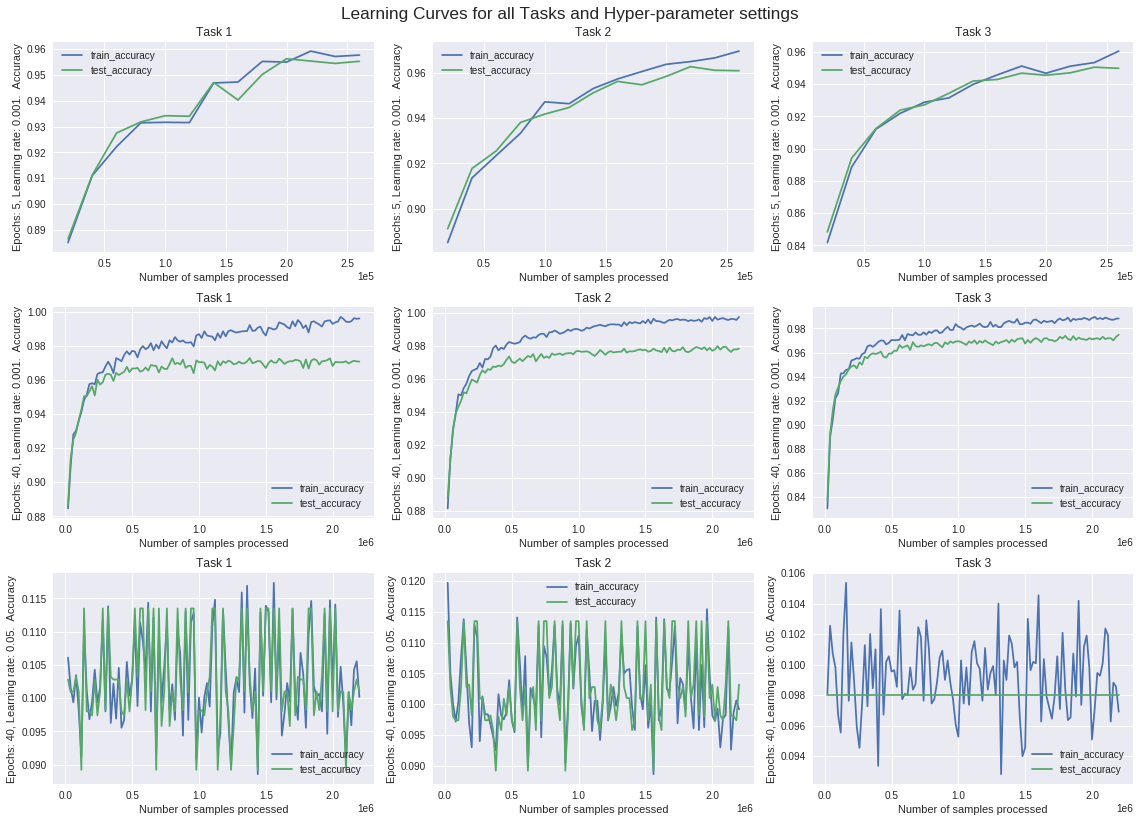

In [79]:
plot_learning_curves([ experiments_task3, experiments_task4,experiments_task5]) 

To show how to prevent overfitting I used Model 3 with parameter setting 2, the initial output can be seen as Task 1 in this output graph. In Task 2 of this graph I mainly used Drop Out to prevent overfitting, which means that a portion of random nodes in some layers will be not taken into account to train the model on.

Starting with an drop out ratio of only 0.1 in only one hidden layer I tried to play with different values of drop out ratio and it tends to actually get even better with a drop out ratio of 0.4. I also tried to increase the drop out ratio with an inreasing number of nodes within the hidden layer which already decreased the overfitting significantly which can be seen in Task 2, using 512 nodes in the hidden layer and 64 nodes in the linear layer with a drop out rate of 0.1 on the input, 0.3 after the non-linear layer and 0.1 after the linear layer. In the output the training accuracy stays nearly the same but the test accuracy increases of about 0.01 to slightly above 0.98.

To bring even more randomness into the model but without loosing the complexity and accuracy I tried even more and added a second non-linear hidden layer but increased the drop out rate. The model has 256 nodes in the first non-linear layer, 128 in the second and 64 nodes in the linear layer. The drop out rates are 0.9 at the input, 0.6 and 0.9 after the first and second non-linear layer and 0.9 after the linear layer. The output using this model can be found in the graph as Task 3. It can be seen that the training accuracy is worse but the test accuracy is slightly higher than in the original model and the two curves tend to have less gap inbetween them and therefor the overfitting is less then in the initial model.

# PART 2:  Backpropagation (35 pts)

### Objectives

This part will be mirroring the first one, but this time you are **not allowed to use any of the Tensorflow functionality for specifing nor optimizing** your neural network models. 
You will now use your **own implementations** of different neural network models (labelled Model 1-3, and described in the corresponding sections of the Colab). This means for each of these models, and the layers they are composed of, you will need to implement:
* **Forward pass**
* **Backward pass**

Keep in mind, the purpose of this exercise is to implement and optimize your own neural networks
architectures without the toolbox/library tailored to do so. **This also means, in order to train and evaluate your models, you will need to implement your own optimization procedure. You are to use the same cross-entropy loss as before and your own implementation of SGD.**

As before, you will train these models to classify hand written digits from the Mnist dataset. 


#### Additional instructions

**Do not use any other libraries than the ones provided in the imports cell.** You should be able to do everything via *numpy* (especially for the convolutional layer, rely on the in-built matrix/tensor multiplication that numpy offers).  

There are a few questions at the end of the colab. **Before doing any coding, please take a look at Question 2.1** -- this should help you with the implementations, especially the optimization part.

### Hints

Remind yourselves of the chain rule and read through the lecture notes on back-propagation (computing 
the gradients by recursively applying the chain rule). This is a general procedure that applies to all model
architectures you will have to code in the following steps. Thus, you are to implement an
optimization procedure that generalizes and can be re-used to train all your models. Recall the only things
that you will need for each layer are: 

(i) the gradients of layer activations with respect to its input

(ii) the gradients with respect to its parameters, if any.

(See Question 2.1).


Also from the previous assignment, you should have a good idea of what to expect, both in terms of behavior and relative performance. (To keep everything comparable, we kept all the hyperparameters and reporting the same).

## Model 1 (10 pts)

### Network

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1

$\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$
where $z \in \mathbb{R}^{10}$ 


Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes:

    train

    validation

    test

Use only the train data in order to optimize the model.

Use datasets.train.next_batch(100) in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, each time evaluate the accuracy of the model both on 20% of the train set and on the entire test set.

In [0]:
# In order to generalise so that this can be re-used to train models 1,2,3 and 4
# I will sub-divide a neural network into parts such as linear, relu 
# which will include fwd/back passes where applicable - this will therefore help
# to be re-purposed for the subsequent models

class LinLayer(object):
  
  def __init__(self, W_shape, b_shape):
    #Using Xavier Initialisation
    [dim_in_W,dim_out_W] = W_shape
    [dim_out_b,dim_in_b] = b_shape
    
    xavier_variance_W = np.sqrt(2.0 / (dim_in_W+dim_out_W))
    xavier_variance_b = np.sqrt(2.0 / (dim_out_b+dim_in_b))
    self.W=np.random.normal(0,xavier_variance_W,W_shape)
    self.b=np.random.normal(0,xavier_variance_b,b_shape)
 
  def ForwardPass(self,input_x):
    return np.matmul(input_x,self.W)+self.b
    
  def BackwardPass(self,Ly,input_x):
    Lx=np.matmul(Ly,np.transpose(self.W))
    Lw=np.matmul(np.transpose(input_x),Ly)
    Lb=np.sum(Ly)#,axis=0)
    
    self.W=self.W-learning_rate*Lw
    self.b=self.b-learning_rate*Lb
    return Lx
  
class NonLinLayerReLU(object):
    
  def ForwardPass(self,input_x):
    return np.maximum(0,input_x)
  
  def BackwardPass(self,y,dLy):
    return dLy*(y>0)
  
class SoftMax(object):
  def ForwardPass(self,input_x):
    exp_x=np.exp(input_x)
    return exp_x/np.sum(exp_x)
  
class CrossEntropyLoss(object):
  def ForwardPass(self, prediction_x, actual):
    return np.sum(np.log((np.sum(np.exp(prediction_x), axis=1))) - prediction_x[range(prediction_x.shape[0]),np.argmax(true_y,1)])
  def BackwardPass(self,prediction_x,true_y): 
    numerator = np.exp(prediction_x - np.maximum.reduce(prediction_x, axis=1,keepdims=True))
    cross_entropy = numerator / np.sum(numerator, axis=1,keepdims=True)
    cross_entropy[range(prediction_x.shape[0]), np.argmax(true_y,axis = 1)] -= 1
    return cross_entropy

In [0]:
class Model1_1LL_SoftM(object):
  def __init__(self):
    self.LL=LinLayer([784,10],[1,10])
    self.SM=SoftMax()
    self.CEL=CrossEntropyLoss()
    
  def Training(self,x,true_y):
    y_LL_output=self.LL.ForwardPass(x)
    
    Ce_back=self.CEL.BackwardPass(y_LL_output,true_y)
    LL_back=self.LL.BackwardPass(Ce_back,x)
    
  def Evaluation(self,input_x,true_y):
    LL_output=self.LL.ForwardPass(input_x)
    SM_output=self.SM.ForwardPass(LL_output)

    pred_y=np.argmax(SM_output,axis=1)
    tr_y=np.argmax(true_y,axis=1)
    
    diff=pred_y-tr_y
    true_predictions=np.sum(diff==0)
    accuracy=true_predictions/float(diff.shape[0])    
    return accuracy

In [88]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
my_experiments_task1 = []
settings = [(5, 0.0001), (5, 0.001), (15, 0.1)]

print('Training Model 1')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:

  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()
  x, y_ = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  model1=Model1_1LL_SoftM()
  
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      
      #################
      # Training step #
      #################
      model1.Training(batch_xs,batch_ys)
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        n_train=mnist.train.images.shape[0]
        n_20_percent=int(n_train*0.2)
        ind_rand=np.random.choice(n_train,n_20_percent,replace=False)
        
        train_im_20_p=np.take(mnist.train.images[:,:],ind_rand,axis=0)
        train_lb_20_p=np.take(mnist.train.labels[:,:],ind_rand,axis=0)
        
        train_accuracy.append(model1.Evaluation(train_im_20_p,train_lb_20_p))
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_im=mnist.test.images[:,:]
        test_lb=mnist.test.labels[:,:]
        test_accuracy.append(model1.Evaluation(test_im,test_lb))

  my_experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

## Model 2 (5 pts)

### Network
1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [0]:

class Model2_1HL_RELU_1LL_SoftM(object):
  def __init__(self):
    self.LL1=LinLayer([784,32],[1,32])
    self.LL2=LinLayer([32,10],[1,10])
    self.ReLU=NonLinLayerReLU()
    self.SM=SoftMax()
    self.CEL=CrossEntropyLoss()
  
  def Training(self,x,true_y):
    y_LL1_output=self.LL1.ForwardPass(x)
    y_ReLU_output=self.ReLU.ForwardPass(y_LL1_output)
    y_LL2_output=self.LL2.ForwardPass(y_ReLU_output)
    
    Ce_back=self.CEL.BackwardPass(y_LL2_output,true_y)
    LL2_back=self.LL2.BackwardPass(Ce_back,y_ReLU_output)
    ReLU_back=self.ReLU.BackwardPass(y_ReLU_output,LL2_back)
    LL1_back=self.LL1.BackwardPass(ReLU_back,x)
    
  def Evaluation(self,input_x,true_y):
    LL1_output=self.LL1.ForwardPass(input_x)
    ReLU_output=self.ReLU.ForwardPass(LL1_output)
    LL2_output=self.LL2.ForwardPass(ReLU_output)
    SM_output=self.SM.ForwardPass(LL2_output)
    
    pred_y=np.argmax(SM_output,axis=1)
    tr_y=np.argmax(true_y,axis=1)
    
    diff=pred_y-tr_y
    true_predictions=np.sum(diff==0)
    accuracy=true_predictions/float(diff.shape[0])
    return accuracy

In [80]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
my_experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.01)]


print('Training Model 2')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  Model2 = Model2_1HL_RELU_1LL_SoftM()

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      Model2.Training(batch_xs, batch_ys)

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        n_train=mnist.train.images.shape[0]
        n_20_percent=int(n_train*0.2)
        ind_rand=np.random.choice(n_train,n_20_percent,replace=False)
        
        train_im_20_p=np.take(mnist.train.images[:,:],ind_rand,axis=0)
        train_lb_20_p=np.take(mnist.train.labels[:,:],ind_rand,axis=0)
        
        train_accuracy.append(Model2.Evaluation(train_im_20_p,train_lb_20_p))
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_im=mnist.test.images
        test_lb=mnist.test.labels
        test_accuracy.append(Model2.Evaluation(test_im,test_lb))


    my_experiments_task2.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

## Model 3 (5 pts)

### Network
2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.05

In [0]:
class Model3_2HL_RELU_1LL_SoftM(object):
  def __init__(self):
    self.LL1=LinLayer([784,32],[1,32])
    self.LL2=LinLayer([32,32],[1,32])
    self.LL3=LinLayer([32,10],[1,10])
    self.ReLU1=NonLinLayerReLU()
    self.ReLU2=NonLinLayerReLU()
    self.SM=SoftMax()
    self.CEL=CrossEntropyLoss()
    
  def Training(self,x,true_y):
    y_LL1_output=self.LL1.ForwardPass(x)
    y_ReLU1_output=self.ReLU1.ForwardPass(y_LL1_output)
    y_LL2_output=self.LL2.ForwardPass(y_ReLU1_output)
    y_ReLU2_output=self.ReLU2.ForwardPass(y_LL2_output)
    y_LL3_output=self.LL3.ForwardPass(y_ReLU2_output)
    
    Ce_back=self.CEL.BackwardPass(y_LL3_output,true_y)
    LL3_back=self.LL3.BackwardPass(Ce_back,y_ReLU2_output)
    ReLU2_back=self.ReLU2.BackwardPass(y_ReLU2_output,LL3_back)
    LL2_back=self.LL2.BackwardPass(ReLU2_back,y_ReLU1_output)
    ReLU1_back=self.ReLU1.BackwardPass(y_ReLU1_output,LL2_back)
    LL1_back=self.LL1.BackwardPass(ReLU1_back,x)
    
  def Evaluation(self,input_x,true_y):
    LL1_output=self.LL1.ForwardPass(input_x)
    ReLU1_output=self.ReLU1.ForwardPass(LL1_output)
    LL2_output=self.LL2.ForwardPass(ReLU1_output)
    ReLU2_output=self.ReLU2.ForwardPass(LL2_output)
    LL3_output=self.LL3.ForwardPass(ReLU2_output)
    SM_output=self.SM.ForwardPass(LL3_output)
    
    pred_y=np.argmax(SM_output,axis=1)
    tr_y=np.argmax(true_y,axis=1)
    
    diff=pred_y-tr_y
    true_predictions=np.sum(diff==0)
    accuracy=true_predictions/float(diff.shape[0])
    return accuracy

In [83]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
my_experiments_task3 = []
settings = [(5, 0.001), (40, 0.001), (40, 0.05)]

print('Training Model 3')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  Model3=Model3_2HL_RELU_1LL_SoftM()
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      Model3.Training(batch_xs,batch_ys)

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        n_train=mnist.train.images.shape[0]
        n_20_percent=int(n_train*0.2)
        ind_rand=np.random.choice(n_train,n_20_percent,replace=False)
        
        train_im_20_p=np.take(mnist.train.images[:,:],ind_rand,axis=0)
        train_lb_20_p=np.take(mnist.train.labels[:,:],ind_rand,axis=0)
        
        train_accuracy.append(Model3.Evaluation(train_im_20_p,train_lb_20_p))
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_im=mnist.test.images[:,:]
        test_lb=mnist.test.labels[:,:]
        test_accuracy.append(Model3.Evaluation(test_im,test_lb))
        

    my_experiments_task3.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

# Results

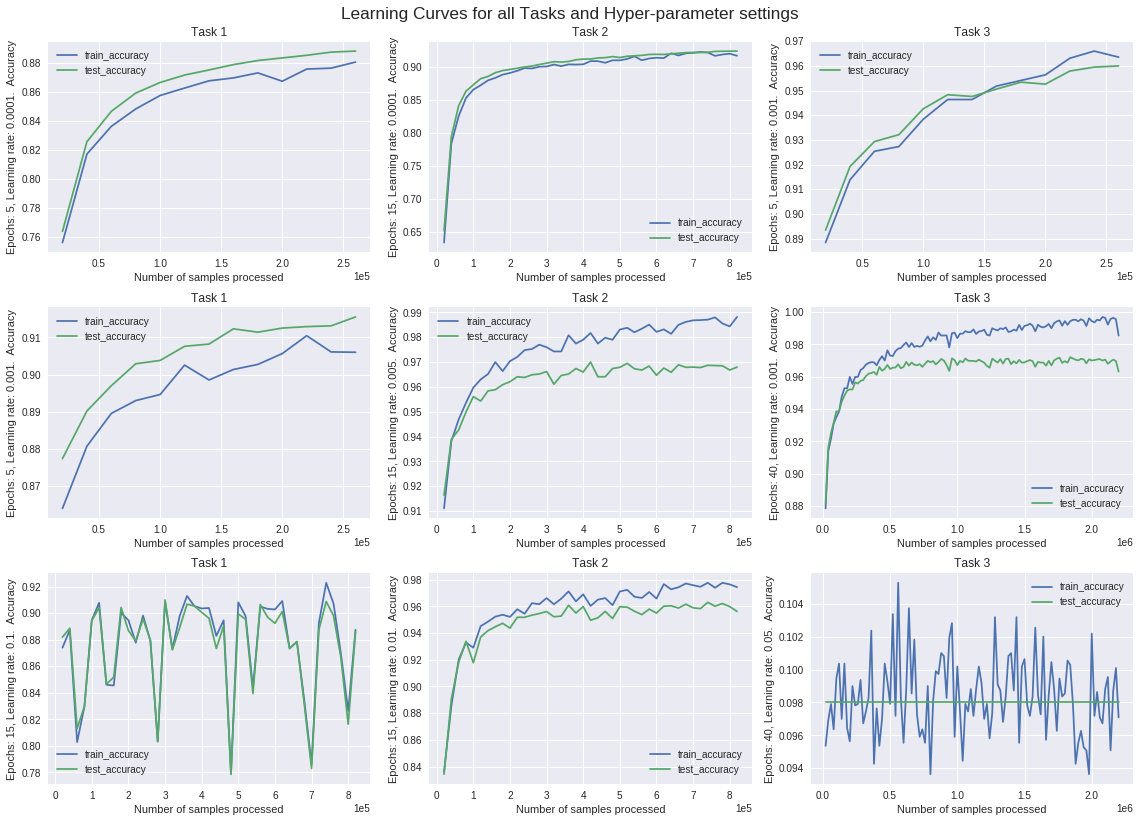

In [89]:
plot_learning_curves([my_experiments_task1, my_experiments_task2, my_experiments_task3])

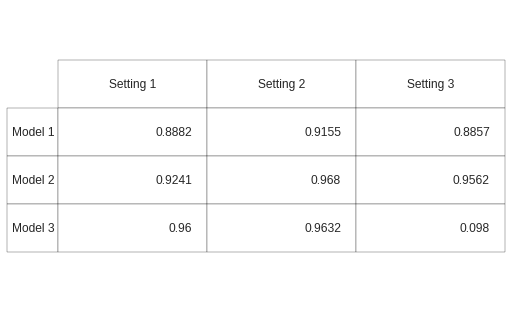

In [90]:
plot_summary_table([my_experiments_task1, my_experiments_task2, my_experiments_task3])

# Questions

###Q2.1 (15 pts): Compute the following derivatives 
Show all intermediate steps in the derivation (in markdown below). Provide the final results in vector/matrix/tensor form whenever appropiate.

a) [5 pts] Given the cross-entropy loss above, compute the derivative of the loss function with respect to the scores $z$ (the input to the softmax layer). 
$$\frac{\partial loss}{\partial z} = ?$$


$$\frac{\partial loss}{\partial z} = \frac{\partial}{\partial z} \sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right) = $$
$$= \sum_{i=1}^N - y_i +\frac{exp(z_i(c))}{{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right) }}$$


b) [10 pts] Consider the first model (M1: linear + softmax). Compute the derivative of the loss with respect to
  * the input $x$
  $$\frac{\partial loss}{\partial x} = ?$$
  
  * the parameters of the linear layer: weights $W$ and bias $b$
  
  $$\frac{\partial loss}{\partial W} = ?
  $$ $$\frac{\partial loss}{\partial b} = ? $$
  
  $$\frac{\partial loss}{\partial x} = \frac{\partial loss}{\partial z} \times \frac{\partial z}{\partial x} = \frac{\partial loss}{\partial z}W^T$$
  
  
  $$\frac{\partial loss}{\partial W} = \frac{\partial loss}{\partial z}\times\frac{\partial z}{\partial W} = \frac{\partial loss}{\partial z}x^T$$
  $$\frac{\partial loss}{\partial b} = \frac{\partial loss}{\partial z}\times\frac{\partial z}{\partial b} = \frac{\partial loss}{\partial z}$$


# PART 3: Convolution Models (35 pts)



## Model 4 (5 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001 

In [11]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task4 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

print('Training Model 4')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  
  with tf.name_scope('c1'):
    c1 = tf.layers.conv2d( inputs=x_image,
      filters=8,
      kernel_size=[3,3],
      padding="same",
      activation=None)
    p1 = tf.layers.max_pooling2d(inputs=c1, pool_size=[2, 2], strides=2)
  with tf.name_scope('c2'):
    c2 = tf.layers.conv2d( inputs=p1,
      filters=8,
      kernel_size=[3,3],
      padding="same",
      activation=None)
    p2 = tf.layers.max_pooling2d(inputs=c2, pool_size=[2, 2], strides=2)
  with tf.variable_scope('LinLayer 1'):
    W = tf.get_variable("W1", dtype=tf.float32, shape=[392, 32]
                              , initializer = tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("b1",dtype=tf.float32, shape=[32]
                              , initializer = tf.contrib.layers.xavier_initializer())
    l1_output = tf.nn.relu(tf.matmul(tf.layers.flatten(p2),W) + b)

  with tf.variable_scope('LinLayer 2'):
    W = tf.get_variable("W2", dtype=tf.float32, shape=[32, 10]
                              , initializer = tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("b2",dtype=tf.float32, shape=[10]
                              , initializer = tf.contrib.layers.xavier_initializer())
    l2_output = tf.matmul(l1_output,W) + b
    class_preds = tf.nn.softmax(l2_output)
    log_loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_, logits = l2_output))
    cor_pred = (tf.math.equal(tf.argmax(y_,axis = 1),tf.argmax(class_preds, axis = 1)))
    accuracy = tf.reduce_mean(tf.to_float(cor_pred))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(log_loss)
    
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run(optimizer, feed_dict={x:batch_xs,y_:batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:
        #####################################
        # Compute and store train accuracy. #
        #####################################
        n_train=mnist.train.images.shape[0]
        n_20_percent=int(n_train*0.2)
        ind_rand=np.random.choice(n_train,n_20_percent,replace=False)
        
        train_im_20_p=np.take(mnist.train.images[:,:],ind_rand,axis=0)
        train_lb_20_p=np.take(mnist.train.labels[:,:],ind_rand,axis=0)
        
        tr_accuracy=sess.run(accuracy,feed_dict={x:train_im_20_p,y_:train_lb_20_p})
        train_accuracy.append(tr_accuracy)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_im=mnist.test.images
        test_lb=mnist.test.labels
        te_accuracy=sess.run(accuracy,feed_dict={x:test_im,y_:test_lb})
        test_accuracy.append(te_accuracy)
    
    experiments_task4.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 4
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
([None, 7, 7, 8], [None, 392])
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
([None, 7, 7, 8], [None, 392])
INFO:tensorflow:Graph was

## Model 5 (10 pts): Separable Convolutions

### Separable Convolutions 
The idea behind separable convolutions is very simple. The premise is that if we consider a 2D/3D filter we would want to apply to an input tensor $x$, we could produce a very similar effect by instead applying a series of simpler transformations (in our case convolutions). Doing this would typically end up in less computations and/or fewer parameters (which in a learn). 

**Example 1:** An famous example of such a 2D filter is the Sobel kernel. 
\\begin{equation}
\\begin{bmatrix} 
-1 & 0 & +1 \\\
-2 & 0 & +2 \\\ 
-1 & 0 & +1
\\end{bmatrix} 
=
\\begin{bmatrix} 
1  \\\
2 \\\ 
1 
\\end{bmatrix} \times [-1, 0,1]
\\end{equation}

Thus we can see that this $3 \times 3$ kernel $k$ can be expressed as the dot product  of $3 \times 1$ kernel $k_1$ and $1 \times 3$ kernel $k_2$. The above is a particular example of a spatial separable convolution, but the principle is more generally applicable. And a common model of 'separating' a kernel is essentially separating the normal convolution process in two parts: a depthwise convolution and a pointwise convolution. The depthwise convolution applies a different convolution kernel to every input channel. This will produce an output tensor with the same number of input channels. Then the pointwise convolution will take this intermediate result and apply a $1 \times 1 \times n_{input\_channels}$ kernel to it. As the name suggests this will look individually at every point in the intermediate output. And we will apply as many of these as we need to produce the desired output channels.


**Example 2**: For instance, if we consider a $3\times 3$ convolutional kernel with $16$ input channels and $64$ output channels. The depthwise convolution will be a $3\times 3 \times 16$ kernel (a $3 \times 3$ kernel for each input channel) and the pointwise kernel will be made of $64$ $1\times 1 \times 16$ kernels.

\\

**References and Further Reading:** \\
[Mobilenet](https://arxiv.org/pdf/1704.04861.pdf) \\
[Inception Models](https://arxiv.org/abs/1610.02357) 


### Model 5
3 layer convolutional model, similar to Model 4, but now with separable convolutions + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ separable conv(3x3x8)$\rightarrow$ separable conv(3x3x4) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- No stride. Use max pooling with 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

In [17]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task5 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

print('Training Model 5')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  
  with tf.name_scope('c1'):
    c1_1 = tf.layers.conv2d( inputs=x_image,
      filters=1,
      kernel_size=[3,3],
      padding="same",
      activation=None)
    c1_2 = tf.layers.conv2d( inputs=c1_1,
      filters=8,
      kernel_size=[1,1],
      padding="same",
      activation=None)
  with tf.name_scope('c2'):
    c2_1 = tf.layers.conv2d( inputs=c1_2,
      filters=1,
      kernel_size=[3,3],
      padding="same",
      activation=None)
    c2_2 = tf.layers.conv2d( inputs=c2_1,
      filters=4,
      kernel_size=[1,1],
      padding="same",
      activation=None)
    pool = tf.layers.max_pooling2d(inputs=c2_2, pool_size=[2, 2], strides=2)

  print(pool.get_shape().as_list(),tf.layers.flatten(pool).get_shape().as_list())  
  with tf.variable_scope('LinLayer 1'):
    W = tf.get_variable("W1", dtype=tf.float32, shape=[784, 32]
                              , initializer = tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("b1",dtype=tf.float32, shape=[32]
                              , initializer = tf.contrib.layers.xavier_initializer())
    l1_output = tf.nn.relu(tf.matmul(tf.layers.flatten(pool),W) + b)

  with tf.variable_scope('LinLayer 2'):
    W = tf.get_variable("W2", dtype=tf.float32, shape=[32, 10]
                              , initializer = tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("b2",dtype=tf.float32, shape=[10]
                              , initializer = tf.contrib.layers.xavier_initializer())
    l2_output = tf.matmul(layer_1_output,W) + b
    class_preds = tf.nn.softmax(l2_output)
    log_loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_, logits = l2_output))
    cor_pred = (tf.math.equal(tf.argmax(y_,axis = 1),tf.argmax(class_preds, axis = 1)))
    accuracy = tf.reduce_mean(tf.to_float(cor_pred))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(log_loss)
    
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run(optimizer, feed_dict={x:batch_xs,y_:batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:
        #####################################
        # Compute and store train accuracy. #
        #####################################
        n_train=mnist.train.images.shape[0]
        n_20_percent=int(n_train*0.2)
        ind_rand=np.random.choice(n_train,n_20_percent,replace=False)
        
        train_im_20_p=np.take(mnist.train.images[:,:],ind_rand,axis=0)
        train_lb_20_p=np.take(mnist.train.labels[:,:],ind_rand,axis=0)
        
        tr_accuracy=sess.run(accuracy,feed_dict={x:train_im_20_p,y_:train_lb_20_p})
        train_accuracy.append(tr_accuracy)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_im=mnist.test.images
        test_lb=mnist.test.labels
        te_accuracy=sess.run(accuracy,feed_dict={x:test_im,y_:test_lb})
        test_accuracy.append(te_accuracy)
    
    experiments_task5.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 5
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
([None, 14, 14, 4], [None, 784])
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
([None, 14, 14, 4], [None, 784])
INFO:tensorflow:Graph

# Results

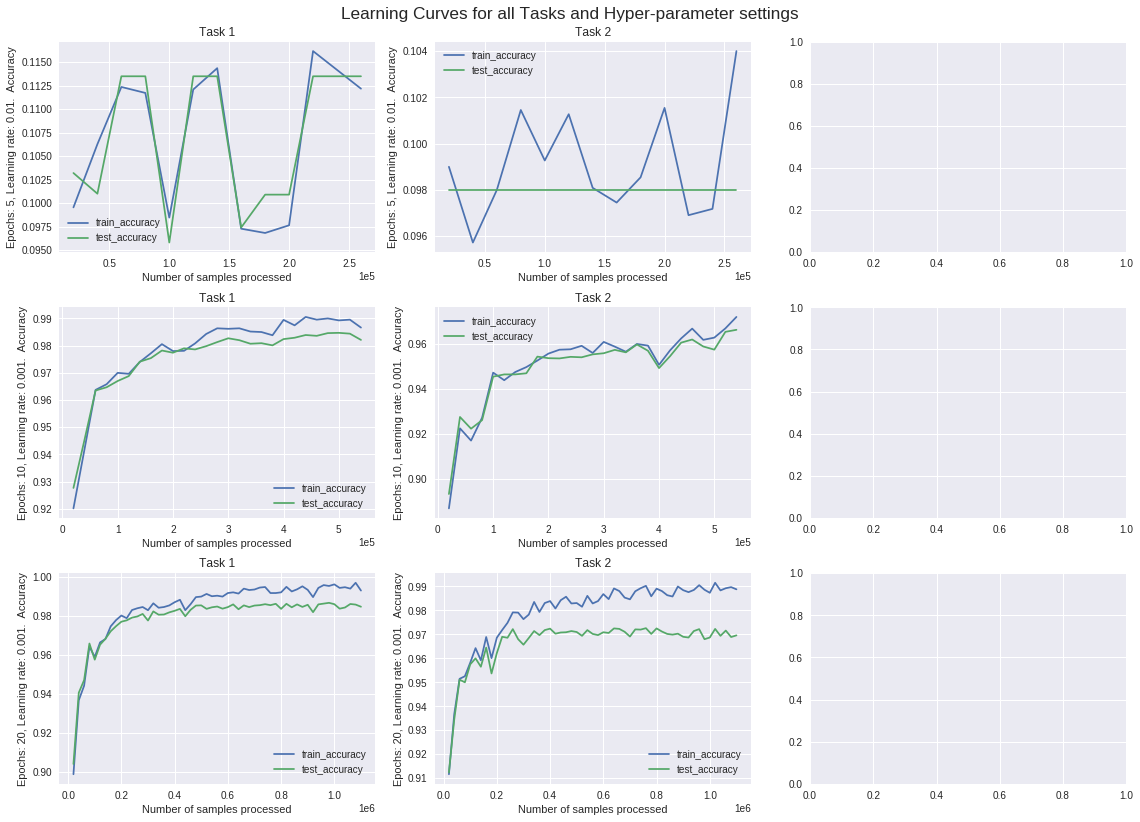

In [13]:
plot_learning_curves([experiments_task4, experiments_task5])

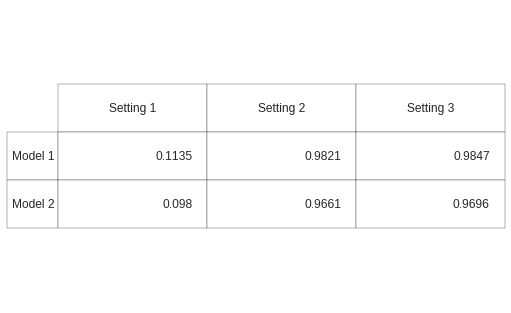

In [14]:
plot_summary_table([experiments_task4, experiments_task5])

# Questions

### Q3.1 (2 pts): Let's revisit Example 2 above (Sec. Separable Convolutions). Given an input image of $28 \times 28 \times 16$:
* a) What are the dimensions of the result of the depthwise convolution? How many computations were performed in this step? \\
* b) What about the dimension of the output after the pointwise convolution?  How many computations were perfomend in this step? \\
* c) Compare this with applying a normal 2D convolution $3\times 3 \times 64$ to the orginal image. What is the dimensionality of the output? What about the number of computations?


*a) Assuming padding='SAME' we would get an ouput of $28\times28\times16$ using a depthwise convolution of $3 \times 3 \times 16$. The number of computations performed in depthwise convolution in our case is $3\times 3 \times 16 \times 28 \times 28 = 112,896$ computations in total.*

*b) After applying the pointwise convolution we get an output with dimensions $28\times28\times64$, its number of computations performed in pointwise convolution in our case is $ 16 \times 64 \times 28 \times 28 = 802,816$ computations in total.*

*c) Using the normal 2D convolution we get the same output after pointwise convolution which is $28\times28\times64$, its number of computations if applying a normal 2D convolution is the filter size $3\times 3 \times 16$ applied 64 times: $3\times 3 \times 16 \times 64 \times 28 \times 28 = 7,225,344$, while when applying seperable convolutions it would only be $112,896+802,816=915,712$.*

### Q3.2 (3 pts): Convolutions vs Separable Convolutions  
* Compare the performance of the two convolutional model vs previous models in Part 1.
* Compare the number of parameters in Model 5 vs Model 4? Explicit computation is required here. 
* Under which conditions could it be advantageous to use separable convolutions instead of normal convolutions?  \\

**Hint:** Think in terms of storage, speed of training, speed of inference, representation power.

1)
Comparing the performance of both convolutional models with parameter settings 2 of Model 2 and Model 3 in part 1 we can see a significant increase in our test accuracy. We also see faster increase of its test accuracy from the beginning, even with less epochs compared to Model 3 parameter settings 2. The test accuracy of Model 4 keeps converging to a level above 0.98 and Model 4 to above 0.97, whereas in part 1 the accuracy of all Models and all parameter settings never go above 0.97.

2)

Number of parameters in Model 4:
  - Conv. Layer 1: $3x3x8=72 +8(bias)=80$ parameters
  - Conv. Layer 2: same size, so again $80$ parameters
  - Nonlin. Layer: Output after 2 max pooling an two conv. layer with padding ='SAME' is 7x7x8, flattening will conclude it to be a vector of 392 values, therefore the nonlinear layer has 392 inputs and 32 outputs: $392x32+32(bias)=12,576$ parameters
  - Lin. Layer: Input 32 and output 10, so: $32x10 + 10(bias) = 330$ parameters
  
 In total that are $80+80+12,576+330=13,066$ parameters
 
 Number of parameters in Model 5:
  - Conv. Layer 1:
    - seperable conv. Layer 1: $3x3x1=9 +1(bias)=10$ parameters
    - seperable conv. Layer 2: $1x1x8=8 +8(bias)=16$ parameters
  - Conv. Layer 2:
     - seperable conv. Layer 1: $3x3x1=9 +1(bias)=10$ parameters
     - seperable conv. Layer 2: $1x1x4=4 +4(bias)=8$ parameters
  - Nonlin. Layer: Output after 1 max pooling an two conv. layer with padding ='SAME' is 14x14x4, flattening will conclude it to be a vector of 784 values, therefore the nonlinear layer has 784 inputs and 32 outputs: $784x32+32(bias)=25,120$ parameters
  - Lin. Layer: Input 32 and output 10, so: $32x10 + 10(bias) = 330$ parameters
  
 In total that are $10+16+10+8+25,120+330=25,494$ parameters.

This significant difference between the number of parameters comes due to the different settings within the model. If we would have the same settings, so a $1x1x8$ seperable conv. Layer 2 and 2 max poolings we would get a vector of 392 values after flattening and therefore would have in total $12,958$ parameters, which would be 108 less.

3)

Using separable convolutions instead of normal ones allows to trade decreased computing time and processor utilization for increased memory utilization. As a result for mobile application which may not have access to mains power and have less compute available seperable convolutions allow the use of CNNs by using the RAM as a memory buffer. Fewer paramers mean faster training and estimation at the cost of its represantative power. 


### Q3.3 (7 pts): Equivalence between 2D convolutions and separable convolutions.

Let's revisit **Example 1** above. Consider a 2D kernel $k$ of dimension $N\times M$ and two 1D kernels: $k_1$, a $1\times N$ and $k_2$, a $1 \times N$ kernel such that $k = k_1^Tk_2$. 
* Prove that the above equality holds, $k = k_1^Tk_2$, applying $k$ to an input signal $x$ is equivalent to applying consecutively the 1D kernels $k_1$ and $k_2$. In which order do these 1D kernels need to be applied for the equivalence to hold?

* Does there always exist such a decomposition? That is, for any 2D kernel $k$, can one find $k_1$ and $k_2$ s.t. $k = k_1^Tk_2$? If so, provide a proof. If not, provide a counter-example.

#### My answer:

#### 1)

$k_2$ should be a $1 \times M$ kernel.

Proof:

We have

$k=
  \left[ {\begin{array}{ccc}
   x_{11} & \ldots & x_{1M} \\
   \vdots & \ddots & \vdots \\
   x_{N1} & \ldots & x_{NM} \\
  \end{array} } \right]$
,  $k_1=\left[ {\begin{array}{ccc}
  y_{11} & \ldots & y_{1N} \\
\end{array} } \right]
$,  $ k_2=\left[ {\begin{array}{ccc}
  z_{11} & \ldots & z_{1M} \\
\end{array} } \right]
$.

Suppose a Matrix $A=
  \left[ {\begin{array}{ccc}
   a_{11} & \ldots & a_{1M} \\
   \vdots & \ddots & \vdots \\
   a_{N1} & \ldots & a_{NM} \\
  \end{array} } \right]$.
  
Applying filter $k$ to $A$ will give us $\sum_{i=1}^{N}\sum_{j=1}^{M} a_{ij}x_{ij}$.

Applying kernel $k_{1}^T$ to A will give us $\left[ {\begin{array}{ccc}
  \sum_{i=1}^{N} a_{i1}y_{1i} & \ldots & \sum_{i=1}^{N} a_{iM}y_{1i} \\
\end{array} } \right]
$ , as it moves from one column to the next one end up being an M dimensional vector after this step.

The row filter $k_{2}$ then leads to the output value of $\sum_{j=1}^{M}\sum_{i=1}^{N} a_{ij}y_{1i}z_{1j}$.

Therefore $x_{ij}=y_{1i}z_{1j}, \forall i=1,...,N, j=1,...,M$

So $k=k_1^T*k_2$.


The order of applying the seperable kernels makes a change due to its orientation:

$k=k_1^Tk_2 \iff k^T=(k_1^Tk_2)^T \iff k^T=k_2^Tk_1$

So if applying these two kernels in the other order it would be the same as if using the transposed kernel. But if the orientation of both kernels stays the same, as of $k_1^T$ and $k_2$ and we apply them in the other order we would get the same as single value multiplication is commutative.

#### 2)

No, you cannot always find such a composition:

For example:

$k=
  \left[ {\begin{array}{ccc}
   1 & 1 &0 \\
   -1 &1 & 0 \\
  0 & 0 & 0 \\
  \end{array} } \right]$
,  $k_1=\left[ {\begin{array}{ccc}
  y_{11} & y_{12} &y_{13}  \\
\end{array} } \right]
$,  $ k_2=\left[ {\begin{array}{ccc}
  z_{11} & z_{12} & & z_{13} \\
\end{array} } \right]
$.

Assuming $k = k_1^Tk_2$, we would get

$\underbrace{\underbrace{y_{11}z_{11}=1, y_{12}z_{11}=-1}_{y_{11}=-y_{12}},\underbrace{ y_{11}z_{12}=1, y_{12}z_{12}=1}_{y_{11}=y_{12}}}_{y_{12}=-y_{12}}$

Therefore we found a counter example and can say that it is not always possible to find such a composition.


### Q3.4 (8 pts): Based potentially on insights from Q3.3. propose a different separate conv. model that achieves similar performance as Model 4, but has fewer parameters. 

a) Report and justify your choice. 

*In Model 5 we applied a depthwise, $3 \times 3 \times 1$, and a pointwise, $1 \times 1 \times 8$  convolution filter at the first convolutional layer instead of a $3 \times 3 \times 8$, so we already saved $72 + 8 (bias)-8-9-8(bias)-1(bias)=54$ parameters. To even save more parameters than in Model 5, so also less than in Model 4, I suggest doing another separation of the $3 \times 3 \times 1$ filter into a $3 \times 1 \times 1$ and a $1 \times 3 \times 1$ filter. Which means I save an additional $9+1(bias)-6-2(bias)=2$ parameters compared to Model 5. Its implementation can be found in b).*

b) Implement, train your model and compare perfomance with Model 4 (setting 3). \\
**Note**:This will likely require a hyperparameter search for the new setting.

*Your answer below*

In [24]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task6 = []
#Grid Search for hyperparameter search:
settings = [(5, 0.01), (5, 0.001), (5, 0.0001),(20, 0.01), (20, 0.001), (20, 0.0001),(35, 0.01), (35, 0.001), (35, 0.0001)]

print('Training Model 6')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:

  # Train Model 1 with the different hyper-parameter settings.
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  
  with tf.name_scope('c1'):
    c1_1 = tf.layers.conv2d( inputs=x_image,
      filters=1,
      kernel_size=[3,1],
      padding="same",
      activation=None)
    c1_2 = tf.layers.conv2d( inputs=c1_1,
      filters=1,
      kernel_size=[1,2],
      padding="same",
      activation=None)
    c1_3 = tf.layers.conv2d( inputs=c1_2,
      filters=8,
      kernel_size=[1,1],
      padding="same",
      activation=None)

  with tf.name_scope('c2'):
    c2_1 = tf.layers.conv2d( inputs=c1_3,
      filters=1,
      kernel_size=[3,1],
      padding="same",
      activation=None)
    c2_2 = tf.layers.conv2d( inputs=c2_1,
      filters=4,
      kernel_size=[1,3],
      padding="same",
      activation=None)
    c2_3 = tf.layers.conv2d( inputs=c2_2,
      filters=4,
      kernel_size=[1,1],
      padding="same",
      activation=None)
    p2 = tf.layers.max_pooling2d(inputs=c2_3, pool_size=[2, 2], strides=2)

  print(p2.get_shape().as_list(),tf.layers.flatten(p2).get_shape().as_list())  
  with tf.variable_scope('LinLayer 1'):
    W = tf.get_variable("W1", dtype=tf.float32, shape=[784, 32]
                              , initializer = tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("b1",dtype=tf.float32, shape=[32]
                              , initializer = tf.contrib.layers.xavier_initializer())
    l1_output = tf.nn.relu(tf.matmul(tf.layers.flatten(p2),W) + b)

  with tf.variable_scope('LinLayer 2'):
    W = tf.get_variable("W2", dtype=tf.float32, shape=[32, 10]
                              , initializer = tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("b2",dtype=tf.float32, shape=[10]
                              , initializer = tf.contrib.layers.xavier_initializer())
    l2_output = tf.matmul(l1_output,W) + b
    class_preds = tf.nn.softmax(l2_output)
    log_loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_, logits = l2_output))
    cor_pred = (tf.math.equal(tf.argmax(y_,axis = 1),tf.argmax(class_preds, axis = 1)))
    accuracy = tf.reduce_mean(tf.to_float(cor_pred))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(log_loss)
    
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run(optimizer, feed_dict={x:batch_xs,y_:batch_ys})
      # Periodically evaluate.
      if i % log_period_updates == 0:
        #####################################
        # Compute and store train accuracy. #
        #####################################
        n_train=mnist.train.images.shape[0]
        n_20_percent=int(n_train*0.2)
        ind_rand=np.random.choice(n_train,n_20_percent,replace=False)

        train_im_20_p=np.take(mnist.train.images[:,:],ind_rand,axis=0)
        train_lb_20_p=np.take(mnist.train.labels[:,:],ind_rand,axis=0)

        tr_accuracy=sess.run(accuracy,feed_dict={x:train_im_20_p,y_:train_lb_20_p})
        train_accuracy.append(tr_accuracy)

        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_im=mnist.test.images
        test_lb=mnist.test.labels
        te_accuracy=sess.run(accuracy,feed_dict={x:test_im,y_:test_lb})
        test_accuracy.append(te_accuracy)

    experiments_task6.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 6
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
([None, 14, 14, 4], [None, 784])
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
([None, 14, 14, 4], [None, 784])
INFO:tensorflow:Graph

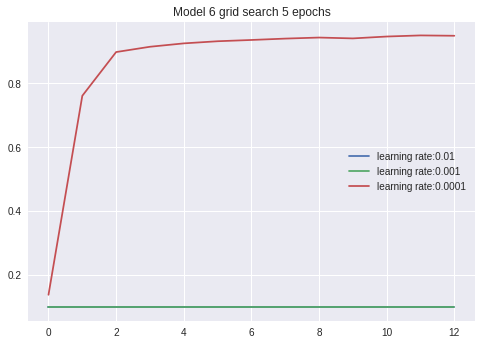

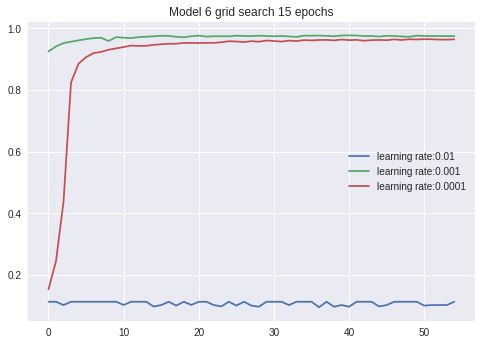

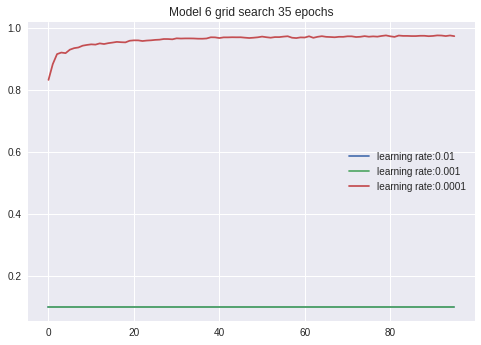

In [27]:
plt.plot(experiments_task6[0][2],label='learning rate:0.01')
plt.plot(experiments_task6[1][2],label='learning rate:0.001')
plt.plot(experiments_task6[2][2],label='learning rate:0.0001')
plt.legend()
plt.title('Model 6 grid search 5 epochs')
plt.show()

plt.plot(experiments_task6[3][2],label='learning rate:0.01')
plt.plot(experiments_task6[4][2],label='learning rate:0.001')
plt.plot(experiments_task6[5][2],label='learning rate:0.0001')
plt.legend()
plt.title('Model 6 grid search 15 epochs')
plt.show()

plt.plot(experiments_task6[6][2],label='learning rate:0.01')
plt.plot(experiments_task6[7][2],label='learning rate:0.001')
plt.plot(experiments_task6[8][2],label='learning rate:0.0001')
plt.legend()
plt.title('Model 6 grid search 35 epochs')
plt.show()

Using grid search to find at least a good parameter setting, the test accuracy is doing best with 35 epochs and a learning rate of 0.0001. I therefore look at this parameter setting more closely bellow and compare it with Model 4 and 5 parameter setting 3.

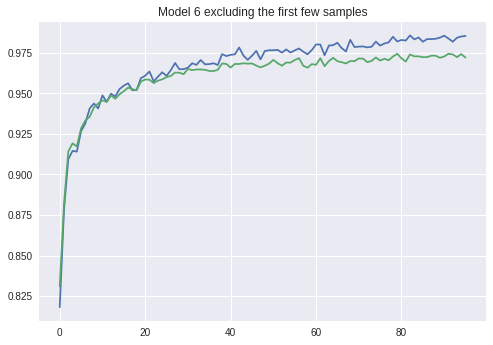

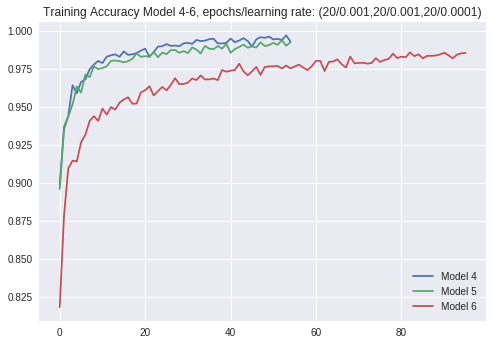

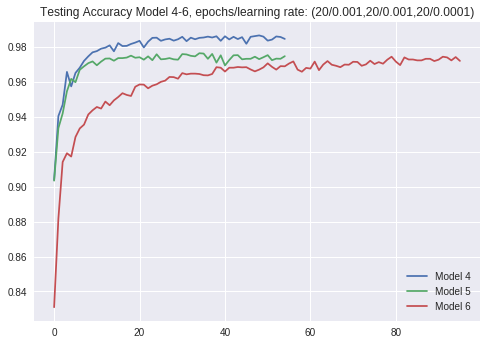

In [31]:
plt.plot(experiments_task6[8][1],label='Model 6 - training set')
plt.plot(experiments_task6[8][2],label='Model 6 - test set')
plt.title('Model 6 excluding the first few samples')
plt.show()

plt.plot(experiments_task4[2][1],label='Model 4')
plt.plot(experiments_task5[2][1],label='Model 5')
plt.plot(experiments_task6[8][1],label='Model 6')
plt.title('Training Accuracy Model 4-6, epochs/learning rate: (20/0.001,20/0.001,20/0.0001)')
plt.legend()
plt.show()

plt.plot(experiments_task4[2][2],label='Model 4')
plt.plot(experiments_task5[2][2],label='Model 5')
plt.plot(experiments_task6[8][2],label='Model 6')
plt.title('Testing Accuracy Model 4-6, epochs/learning rate: (20/0.001,20/0.001,20/0.0001)')
plt.legend()
plt.show()

Looking at the first graph where I just printed the accuracy of Model 6 in the training and test set, we can see that the overfitting is sufficiently lower compared to Model 4 and 5. Comparing Model 6 to the others we can see that we have a worse accuracy at the beginning but its accuracy keeps growing to a sufficient good level.